In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
DATASET_PATH = '../datasets/segmentation-evaluation-database/1obj'

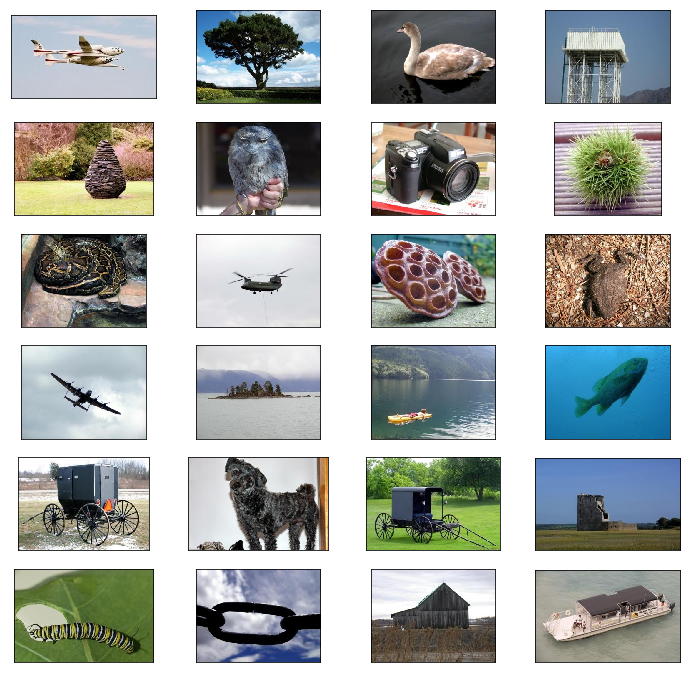

In [3]:
src_color_image_paths = glob.glob(DATASET_PATH + '/*/src_color/*.png')
images = list(filter(lambda X: X.shape[0] < X.shape[1], map(mpimg.imread, src_color_image_paths)))

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

for ax, img in zip(axes.flat, images):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

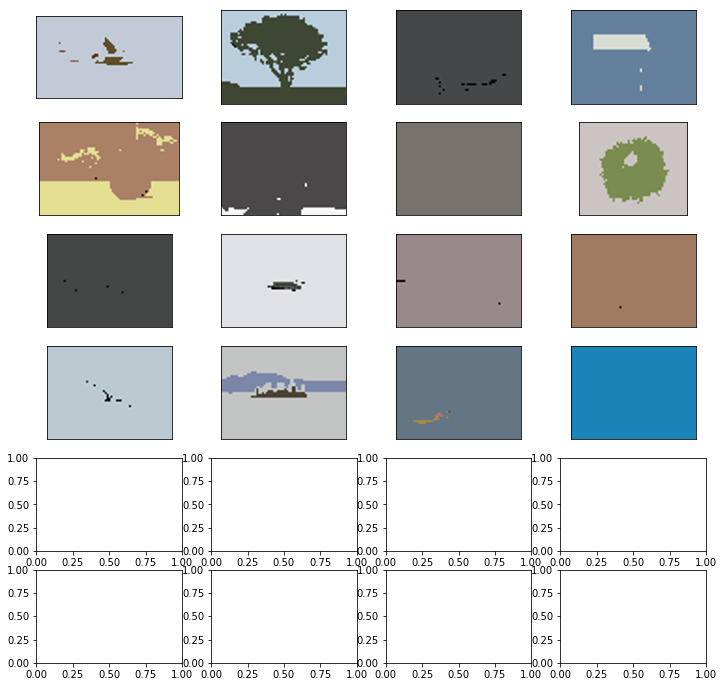

In [4]:
algo_seg_image_paths = glob.glob(DATASET_PATH + '/*/algo_seg/*.png')
images = list(filter(lambda X: X.shape[0] < X.shape[1], map(mpimg.imread, algo_seg_image_paths[:6*4])))

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

for ax, img in zip(axes.flat, images):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [5]:
img = images[0]

d = dict()
for x in [img[i, j] for i in range(img.shape[0]) for j in range(img.shape[1])][:1]:
    d[f"{x}"] = 1
d

{'[0.7607843  0.7921569  0.84313726]': 1}

In [6]:
mask = img == img[0,0]
np.where(~mask)

(array([ 578,  578,  578, ..., 1571, 1571, 1571], dtype=int64),
 array([2047, 2048, 2049, ..., 2850, 2851, 2852], dtype=int64),
 array([2, 2, 2, ..., 2, 2, 2], dtype=int64))

In [11]:
np.unique(img.reshape(-1, 3), axis=0)

array([[0.20392157, 0.10196079, 0.        ],
       [0.20392157, 0.10196079, 0.00392157],
       [0.20392157, 0.10196079, 0.00784314],
       ...,
       [0.81960785, 0.8666667 , 0.9411765 ],
       [0.81960785, 0.8666667 , 0.94509804],
       [0.81960785, 0.8666667 , 0.9490196 ]], dtype=float32)

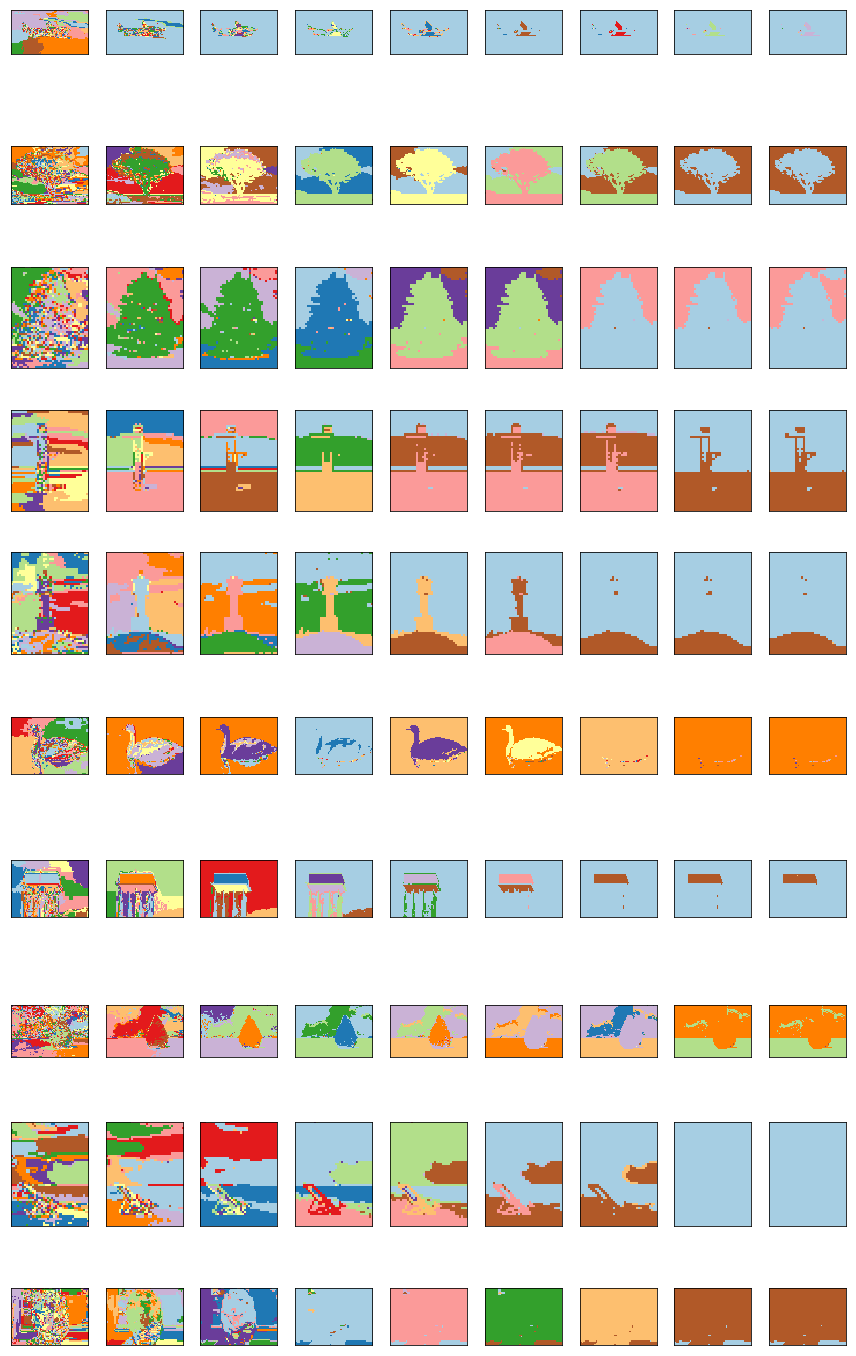

In [78]:
import re
from collections import defaultdict

segmentations = [
    re.match(r".*\\(.*)-h=(.*)-K=(.*)\.png", path).group(0, 1, 2, 3)
    for path in glob.glob(DATASET_PATH + '/*/algo_seg/*-h=*-K=*.png')
    if not re.match(".*-T.png", path)
]

d = defaultdict(list)
for (path, name, h, K) in segmentations:
    d[name].append((path, float(h), K))


n = 10
fig, axes = plt.subplots(ncols=9, nrows=n, figsize=(12, n * 2))
col_map = dict(((i+1)/10, i) for i in range(0, 9))

for axes_row, (name, segmentations) in zip(axes, d.items()):
    for (path, h, K) in segmentations:
        if h in col_map:
            img = mpimg.imread(path)
            ax = axes_row[col_map[h]]
            ax.imshow(img, cmap='Paired')
            ax.set_xticks([])
            ax.set_yticks([])
            


fig.tight_layout()
plt.show()
